In [ ]:
## Ejecutar antes de comenzar para cargar la carpeta con el archivo de audio

!git clone https://github.com/jmmarinr/FisExperimental3.git

Cloning into 'FisExperimental3'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 179 (delta 36), reused 48 (delta 11), pack-reused 86 (from 1)
Receiving objects: 100% (179/179), 6.76 MiB | 19.67 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
# @title Librerias

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.io import wavfile
from IPython.display import Audio


**IMPORTANTE**: Incluir en la bitácora


# Actividad 1







A continuación, se adjunta un archivo de audio en formato .wav correspondiente a la grabación de una nota musical proveniente de un piano. Tomando como base este archivo de audio, realice lo siguiente:


In [ ]:
Audio('/content/FisExperimental3/Tarea1/archivo_audio_tarea1.wav')

## Punto 1

Grafique la señal en función del tiempo. Imprima la frecuencia de muestreo y el número de muestras.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.io import wavfile
from IPython.display import Audio
from google.colab import files
uploaded = files.upload()

In [ ]:
samplerate, data = wavfile.read('/content/FisExperimental3/Tarea1/archivo_audio_tarea1.wav')

print(f'Sample frequency= {samplerate} Hz')
print(f'Number of samples = {len(data)}')

Sample frequency= 11025 Hz
Number of samples = 11250


Text(0.5, 1.0, 'Señal en función del tiempo')

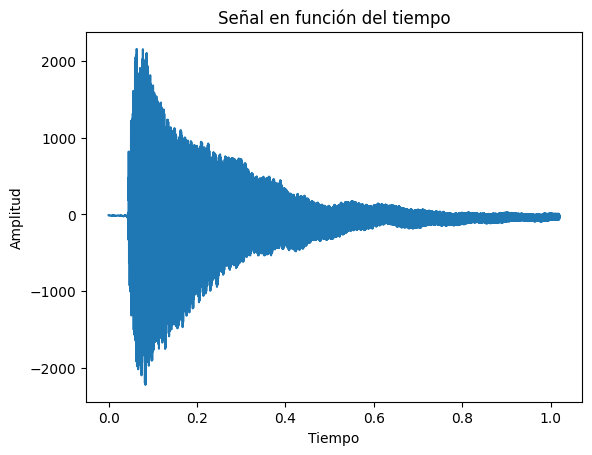

In [ ]:
dt = 1 / samplerate
t0 = 0
tf = len(data)*dt

tiempo = np.arange(t0,tf,dt)
señal = data
plt.plot(tiempo,señal)

plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal en función del tiempo")

## Punto 2

Calcule la transformada de Fourier y realice un código para identificar y hacer una lista con la frecuencia fundamental y las secundarias$^1$. Grafique la magnitud de la transformada en función de la frecuencia y superponga los puntos correspondientes a los máximos.



$^1$ Puede emplear la librería <code> find_peaks </code> de <code >scipy.signal </code>.

Frecuencias: [ 771.26  776.16  784.   1571.92 2367.68]


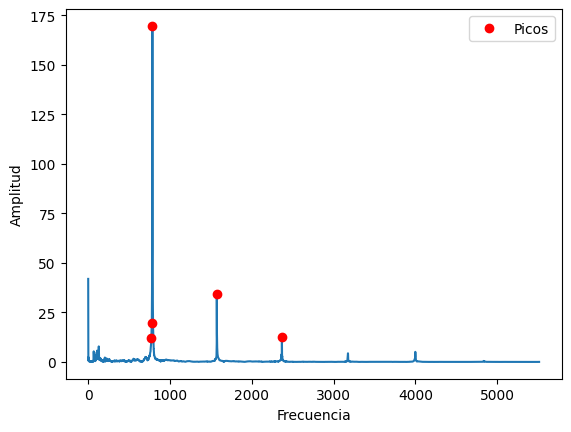

In [ ]:
from scipy.signal import find_peaks

señal_FFT = np.fft.fft(señal/len(señal))
señal_FFT = señal_FFT[range(int(len(señal)/2))]

indices = np.arange(len(señal_FFT))
tiempo_duracion = len(señal) / samplerate
frecuencias = indices / tiempo_duracion

picos, _ = find_peaks(np.abs(señal_FFT), height=10)
frecuencias_encontradas = frecuencias[picos]   #solo toma las frecuancias donde hay picos

plt.plot(frecuencias,np.abs(señal_FFT))
plt.plot(frecuencias_encontradas,abs(señal_FFT)[picos],"o",color="red",label="Picos")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend()
print(f"Frecuencias: {frecuencias_encontradas}")

## Punto 3

Con base en la ecuación $f_N$ =440 Hz$\times$2$^{N/12}$, con $f_N$ la frecuencia de la nota $N$ y siendo $N=0$ la nota La4, identifique el nombre de la nota musical presente en la grabación.


In [ ]:
def fN(f):
  '''
  Esta función halla la nota N correspondiente a la frecuencia f
  '''
  N = 12*np.log2(f/440)

  N_lista = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8,
                9, 10, 11, 12, 13]

  notas = ["Do 4", "Do# 4", "Re 4", "Re# 4", "Mi 4", "Fa 4", "Fa# 4", "Sol 4",
           "Sol# 4", "La 4", "La# 4", "Si", "Do 5", "Do# 5", "Re 5", "Re# 5",
           "Mi 5", "Fa 5", "Fa# 5", "Sol 5", "Sol# 5", "La 5", "La# 5"]

  for i in range(len(N_lista)):
    if round(N) == N_lista[i]:
      print(f"La nota asociada a la frecuencia {f} es {notas[i]}")
      break


fN(frecuencias_encontradas[2])
#Se toma la 3 nota, pues es la frecuencia fundamental

La nota asociada a la frecuencia 784.0 es Sol 5


## Punto 4

En la señal de la grabación puede identificar que esta desaparece gradualmente. Este decaimiento en la amplitud se puede modelar con la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. Realice un código para encontrar la amplitud de las oscilaciones1 $r’(t)={…}$ y ajuste $^2$ los valores de $r’(t)$ al modelo $r(t)$ con el fin de hallar los parámetros $r_0$ y τ. Superponga las gráficas de la grabación con la de $r’(t)$ y $r(t)$ y compruebe si el modelado del decaimiento es correcto.


$^2$ Para realizar el ajuste, puede linealizar el modelo aplicando logaritmo natural a ambos lados de la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. De este modo se puede hacer un ajuste lineal en lugar de uno exponencial.


Aplicando $ln$ a ambos lados de la ecuación se llega a que $ln(r(t)) = ln(r_0) - \frac{t}{\tau}$. Aplicando el método de mínimos cuadrados se puede obtener $ln(r_0)$ y $- \frac{1}{\tau}$  que son los parámetros buscados.

In [ ]:
indices, _ = find_peaks(señal, height=0.1)
amplitudes = np.array([señal[i] for i in indices])
t = np.array([tiempo[i] for i in indices])

y = np.log(abs(amplitudes))
x = t

pendiente, intercepto, _, _, _ = sp.stats.linregress(x, y)
tau = -1/pendiente
r0 = np.exp(intercepto)

print(f"r_0 es {r0} y tau es {tau}")

r_0 es 3121.4368433517748 y tau es 0.1534843704097743


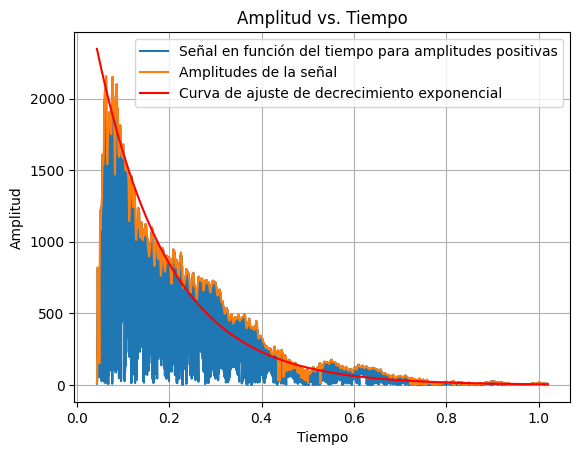

In [ ]:
n_señal = []
time = []
for i in range(len(señal)):
  if señal[i] >= 0:
    n_señal.append(señal[i])
    time.append(tiempo[i])

plt.plot(time, n_señal, label = 'Señal en función del tiempo para amplitudes positivas')
plt.plot(t,amplitudes, label = 'Amplitudes de la señal')
plt.plot(t,r0*np.exp(-t/tau), label = 'Curva de ajuste de decrecimiento exponencial',c='r')

plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.title("Amplitud vs. Tiempo")
plt.show()

## Punto 5

Con base en los resultados del punto 2), construya la siguiente tabla:

| Frecuencia ($f_i$) | Amplitud ($A_i$) |
|:--------:|:--------:|
|Valor 1|Valor 2|

In [ ]:
# Aqui su código


In [ ]:
import pandas as pd

# Create a dictionary from the frequencies and their absolute amplitudes found in Punto 2
data = {'Frecuencia ($f_i$)': frecuencias_encontradas, 'Amplitud ($A_i$)': np.abs(señal_FFT)[picos]}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a markdown table
display(df)

,Frecuencia ($f_i$),Amplitud ($A_i$)
0,771.26,12.051844
1,776.16,19.575908
2,784.00,169.689388
3,1571.92,34.535214
4,2367.68,12.775692


## Punto 6
Usando la tabla anterior, sintetice la señal del piano, usando la ecuación para $S(t)$ y cree un archivo de audio con ella o reprodúzcala en su tarjeta de sonido.


$$S(t)=r(t)\sum_i A_i \sin (2π ×f_i×t)$$

Compare ambas señales sintética y real y concluya sobre sus diferencias, tanto a nivel físico (comparando las gráficas en función del tiempo) como subjetivo (calidad o riqueza del sonido). ¿Las frecuencias que se excluyeron de $S(t)$ qué tanto afectan la calidad del sonido?



In [ ]:
# Aqui su código


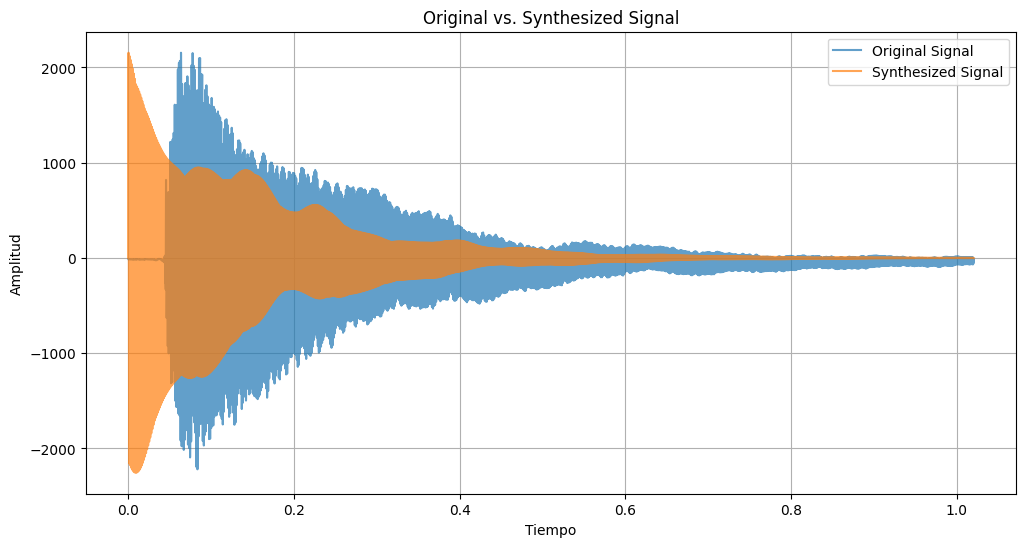

In [ ]:
# Synthesize the signal using the formula S(t) = r(t) * sum(Ai * sin(2*pi*fi*t))
synthesized_signal = np.zeros_like(tiempo) # Initialize with zeros

# Extract frequencies and amplitudes from the DataFrame
frequencies = df['Frecuencia ($f_i$)'].values
amplitudes = df['Amplitud ($A_i$)'].values

for i in range(len(frequencies)):
  synthesized_signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * tiempo)

# Apply the exponential decay r(t) = r0 * exp(-t/tau)
decay_envelope = r0 * np.exp(-tiempo / tau)

# Combine the synthesized signal with the decay envelope
synthesized_signal *= decay_envelope

# Scale the synthesized signal to the original signal's range for better comparison
synthesized_signal = synthesized_signal * (np.max(señal) / np.max(synthesized_signal))

# You can now either play the synthesized audio or save it to a file.
# Uncomment the line below to play the audio in the notebook:
# Audio(synthesized_signal, rate=samplerate)

# Uncomment the lines below to save the audio to a .wav file:
# from scipy.io.wavfile import write
# write('synthesized_audio.wav', samplerate, synthesized_signal.astype(np.int16))

# Plot the original and synthesized signals for comparison
plt.figure(figsize=(12, 6))
plt.plot(tiempo, señal, label='Original Signal', alpha=0.7)
plt.plot(tiempo, synthesized_signal, label='Synthesized Signal', alpha=0.7)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Original vs. Synthesized Signal")
plt.legend()
plt.grid(True)
plt.show()

## Punto 7

Escriba sus conclusiones y aportes personales sobre este ejercicio. Además discuta sobre la importancia de la transformada de Fourier en el análisis de señales de auido

In [ ]:
# Aqui su código


## Conclusiones y Aportes Personales (Punto 7)

En este ejercicio, hemos explorado el análisis y la síntesis de una señal de audio de una nota de piano utilizando herramientas de procesamiento de señales como la Transformada de Fourier y el ajuste de modelos de decaimiento exponencial.

**Importancia de la Transformada de Fourier en el Análisis de Señales de Audio:**

La Transformada de Fourier demostró ser fundamental para descomponer la señal de audio en sus frecuencias constituyentes. Esto nos permitió identificar la frecuencia fundamental y los armónicos presentes en la nota del piano, lo cual es crucial para entender el timbre y la calidad del sonido.

**Conclusiones sobre el Ejercicio:**

*   [Insertar aquí tus conclusiones sobre lo que aprendiste al graficar la señal en el tiempo, analizar el espectro de frecuencia, identificar picos, y modelar el decaimiento.]
*   [Discutir la precisión del modelo de decaimiento exponencial en la representación de la envolvente de amplitud de la señal.]
*   [Comparar la señal original con la señal sintetizada. Mencionar las similitudes y diferencias observadas tanto en la gráfica como, si la reproduciste, en la percepción auditiva.]
*   [Analizar cómo la exclusión de ciertas frecuencias (las no identificadas como picos significativos) afectó la calidad o riqueza del sonido sintetizado en comparación con el original.]

**Aportes Personales:**

*   [Incluir aquí cualquier reflexión personal sobre el proceso, desafíos encontrados, y cómo abordaste la resolución de cada punto.]
*   [Mencionar cualquier conocimiento adicional que hayas adquirido o cómo este ejercicio ha profundizado tu comprensión del procesamiento de señales de audio.]